# Plotting Price comparisons between modal,msprice and deseasonalized price

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\vj0805\\Desktop\\Socialcops\\deseasonalize_data.csv")

In [3]:
df["date"]=pd.to_datetime(df["date"])

In [4]:
commodity = df['Commodity'].unique().tolist()

In [5]:
df_mandi = pd.read_csv("C:\\Users\\vj0805\\Desktop\\Socialcops\\CMO_MSP_Mandi_filtered.csv")

In [6]:
commodities = df_mandi['commodity'].unique().tolist()

In [7]:
df_mandi = df_mandi[df_mandi['year'] != 2012]
df_mandi = df_mandi[df_mandi['year'] != 2013]
df_mandi["year"]=pd.to_datetime(df_mandi["year"], format= '%Y')
df_mandi.head()

,commodity,year,Type,msprice,msp_filter
2,bajri,2014-01-01,Kharif Crops,1250.0,1
3,bajri,2015-01-01,Kharif Crops,1275.0,1
4,bajri,2016-01-01,Kharif Crops,1330.0,1
7,cotton,2014-01-01,Kharif Crops,3750.0,1
8,cotton,2015-01-01,Kharif Crops,3800.0,1


In [8]:
def compare_price(apmc, commodity):
    
    label = str(apmc)+'_'+str(commodity)
    data_filter = df[df["identifier"]==label]
    if data_filter.shape[0] == 0: 
        return "Not enough data"
    
    msp = df_mandi[df_mandi['commodity'] == commodity]
    msp = msp[['year', 'msprice']]
    
    # Plotting (Dates on X axis)
    xaxis = pd.to_datetime(data_filter['date'])
    plt.figure(figsize=(9, 7))
    plt.plot(data_filter['date'], data_filter['modal_price'])
    plt.plot(data_filter['date'], data_filter['deseasonalise_price'])
    plt.plot(msp['year'], msp['msprice'], color = 'y')
    plt.legend(['Actual price', 'Deseasonalized', 'MSP'])
    plt.show()
    plt.savefig("Price Comaprison.jpg",dpi=300)

Enter APMC: Telhara
Enter Commodity within that APMC: soybean


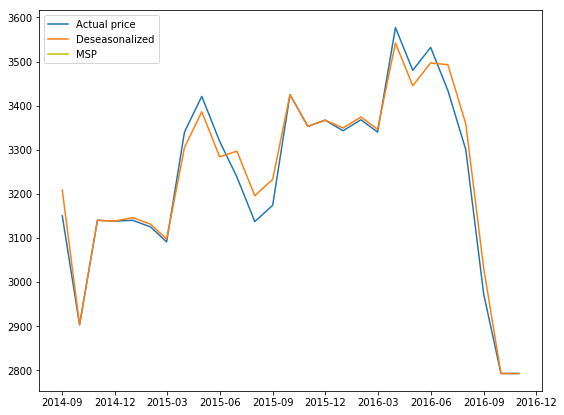

<Figure size 432x288 with 0 Axes>

In [11]:
apmc = input('Enter APMC: ')
comm = input('Enter Commodity within that APMC: ')

compare_price(apmc,comm)